In [43]:
#Importing all the necessary Libraries
import pandas as panda
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#The following Code Snippet should be executed while using Google Colab
#Mount GDrive data
#from google.colab import drive
#drive.mount('/content/drive')

#Load the dataset [using Google Colab]
#Dataset Path
#dataset_path contains the path where you have stored the sentimentdataset.csv file in your Google Drive.
#This is a sample path, replace the following path with the path of the file in your case.
#dataset_path = '/content/drive/My Drive/Datasets/SocialMediaUserEngagement/sentimentdataset.csv'
#df = panda.read_csv(dataset_path)

In [3]:
#Load the dataset [using Jupyter Notebook]

#In case you are using Jupyter Notebook or storing the sentimentdataset.csv on your device locally, then follow the following step.
df=panda.read_csv('sentimentdataset.csv') #csv File should be saved in the same folder as your ipynb file
print(df) #Testing if the data is being accessed properly or not

     Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728  Attending a surprise birthday 

In [4]:
#Data Preprocessing
#Converting timestamp to datetime format to extract the Time_of_Day
df['Timestamp'] = panda.to_datetime(df['Timestamp'])
#df['Time_of_Day'] = df['Timestamp'].dt.hour.apply(lambda x: 'DAY' if 6 <= x < 18 else 'NIGHT')

#Converting Time_of_Day into binary - 0 is Day [06:00hrs to 18:00hrs] and 1 is Night [18:00hrs to 06:00hrs]
df['Time_of_Day'] = df['Timestamp'].dt.hour.apply(lambda x: 0 if 6 <= x < 18 else 1)


In [5]:
#Encode hashtags for analysis
lab_enc = LabelEncoder()
df['Hashtags'] = lab_enc.fit_transform(df['Hashtags'])

In [6]:
#Normalising Likes and Retweets
scale = MinMaxScaler()
df[['Likes', 'Retweets']] = scale.fit_transform(df[['Likes', 'Retweets']])

In [7]:
distinct_sentiments = df['Sentiment'].unique()
print("Distinct Sentiments:", distinct_sentiments)

Distinct Sentiments: [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' 

In [8]:
#Normalise Sentiment Scores
sent_mapping = {
    ' Positive  ': 0.8,
    ' Negative  ': 0.2,
    ' Neutral   ': 0.5,
    ' Anger        ': 0.1,
    ' Fear         ': 0.3,
    ' Sadness      ': 0.2,
    ' Disgust      ': 0.1,
    ' Happiness    ': 0.8,
    ' Joy          ': 0.8,
    ' Love         ': 0.9,
    ' Amusement    ': 0.7,
    ' Enjoyment    ': 0.7,
    ' Admiration   ': 0.8,
    ' Affection    ': 0.8,
    ' Awe          ': 0.8,
    ' Disappointed ': 0.3,
    ' Surprise     ': 0.7,
    ' Acceptance   ': 0.7,
    ' Adoration    ': 0.8,
    ' Anticipation ': 0.7,
    ' Bitter       ': 0.3,
    ' Calmness     ': 0.6,
    ' Confusion    ': 0.5,
    ' Excitement   ': 0.7,
    ' Kind         ': 0.7,
    ' Pride        ': 0.8,
    ' Shame        ': 0.2,
    ' Elation       ': 0.8,
    ' Euphoria      ': 0.9,
    ' Contentment   ': 0.8,
    ' Serenity      ': 0.8,
    ' Gratitude     ': 0.8,
    ' Hope          ': 0.7,
    ' Empowerment   ': 0.7,
    ' Compassion    ': 0.8,
    ' Tenderness    ': 0.8,
    ' Arousal       ': 0.7,
    ' Enthusiasm    ': 0.7,
    ' Fulfillment  ': 0.7,
    ' Reverence     ': 0.8,
    ' Zest ': 0.7,
    ' Contentment ': 0.8,
    ' Hopeful ': 0.7,
    ' Proud ': 0.8,
    ' Grateful ': 0.8,
    ' Empathetic ': 0.8,
    ' Compassionate ': 0.8,
    ' Playful ': 0.7,
    ' Free-spirited ': 0.7,
    ' Inspired ': 0.7,
    ' Confident ': 0.7,
    ' Curiosity ': 0.7,
    ' Ambivalence ': 0.5,
    ' Despair ': 0.2,
    ' Bitterness ': 0.3,
    ' Yearning ': 0.3,
    ' Fearful ': 0.3,
    ' Apprehensive ': 0.4,
    ' Overwhelmed ': 0.2,
    ' Jealous ': 0.3,
    ' Devastated ': 0.2,
    ' Frustrated ': 0.3,
    ' Envious ': 0.3,
    ' Dismissive ': 0.3,
    ' Awe           ': 0.8,
    ' Determination ': 0.7,
    ' Nostalgia      ': 0.6,
    ' Thrill         ': 0.7,
    ' Calmness       ': 0.6,
    ' Overwhelmed    ': 0.2,
    ' Gratitude  ': 0.8,
    ' Bittersweet ': 0.5,
    ' Curiosity     ': 0.7,
    ' Admiration    ': 0.8,
    ' Overjoyed     ': 0.8,
    ' Inspiration   ': 0.7,
    ' Motivation    ': 0.7,
    ' Amusement     ': 0.7,
    ' Contemplation ': 0.6,
    ' JoyfulReunion ': 0.8,
    ' Excitement    ': 0.7,
    ' Satisfaction  ': 0.8,
    ' Blessed       ': 0.8,
    ' Anticipation  ': 0.7,
    ' Reflection    ': 0.7,
    ' Nostalgia     ': 0.6,
    ' Appreciation  ': 0.8,
    ' Confidence    ': 0.7,
    ' Surprise      ': 0.7,
    ' Accomplishment': 0.8,
    ' Wonderment    ': 0.7,
    ' Optimism      ': 0.7,
    ' Pride         ': 0.8,
    ' Happiness     ': 0.8,
    ' Curiosity   ': 0.7,
    ' Enchantment   ': 0.8,
    ' Intrigue      ': 0.6,
    ' PlayfulJoy    ': 0.8,
    ' Mindfulness   ': 0.7,
    ' DreamChaser   ': 0.7,
    ' Elegance ': 0.7,
    ' Whimsy        ': 0.7,
    ' Pensive ': 0.5,
    ' Thrill       ': 0.7,
    ' Harmony    ': 0.7,
    ' Creativity   ': 0.7,
    ' Radiance    ': 0.7,
    ' Wonder     ': 0.7,
    ' Rejuvenation ': 0.7,
    ' Inspiration ': 0.7,
    ' Coziness     ': 0.7,
    ' Gratitude  ': 0.8,
    ' Adventure ': 0.7,
    ' Euphoria   ': 0.9,
    ' Awe    ': 0.8,
    ' Melodic       ': 0.7,
    ' FestiveJoy    ': 0.8,
    ' InnerJourney  ': 0.7,
    ' Freedom       ': 0.7,
    ' Dazzle        ': 0.8,
    ' Adrenaline     ': 0.7,
    ' Harmony       ': 0.7,
    ' ArtisticBurst ': 0.7,
    ' Radiance      ': 0.7,
    ' Wonder       ': 0.7,
    ' Inspiration  ': 0.7,
    ' CulinaryOdyssey ': 0.7,
    ' Euphoria     ': 0.9,
    ' Curiosity  ': 0.7,
    ' Resilience   ': 0.7,
    ' Immersion ': 0.7,
    ' Nostalgia ': 0.6,
    ' Spark        ': 0.6,
    ' Marvel       ': 0.7,
    ' Serenity   ': 0.8,
    ' Heartbreak    ': 0.2,
    ' Loneliness    ': 0.2,
    ' Grief      ': 0.2,
    ' Despair   ': 0.2,
    ' Betrayal      ': 0.2,
    ' Suffering ': 0.2,
    ' EmotionalStorm ': 0.3,
    ' Regret        ': 0.2,
    ' Isolation ': 0.2,
    ' Disappointment ': 0.2,
    ' LostLove ': 0.2,
    ' Melancholy ': 0.2,
    ' Exhaustion ': 0.3,
    ' Sorrow      ': 0.2,
    ' Darkness     ': 0.1,
    ' Desperation ': 0.2,
    ' Ruins      ': 0.1,
    ' Desolation ': 0.2,
    ' Grief ': 0.2,
    ' Heartbreak ': 0.2,
    ' Betrayal ': 0.2,
    ' Resilience ': 0.7,
    ' Sorrow ': 0.2,
    ' Loss ': 0.2,
    ' Heartache ': 0.2,
    ' Solitude ': 0.2,
    ' Happy ': 0.8,
    ' Embarrassed ': 0.3,
    ' Mischievous ': 0.7,
    ' Sad ': 0.2,
    ' Hate ': 0.1,
    ' Bad ': 0.1,
    ' Neutral ': 0.5
}
#print(df['Sentiment'])
df['Sentiment'] = df['Sentiment'].map(sent_mapping)
print(df['Sentiment'])


0      0.8
1      0.2
2      0.8
3      0.8
4      0.5
      ... 
727    0.8
728    0.8
729    0.8
730    0.8
731    0.8
Name: Sentiment, Length: 732, dtype: float64


In [9]:
#Calculate combined user engagement score
#Assigning Weights to different parameters based on their importance adn effectiveness
weights = {'Sentiment': 0.4, 'Likes': 0.3, 'Retweets': 0.3}
df['Combined_User_Engagement_Score'] = (df['Sentiment']* weights['Sentiment']) + (df['Likes']* weights['Likes']) + (df['Retweets']* weights['Retweets'])

In [10]:
#Drop Unnecessary Columns
df.drop(['Unnamed: 0', 'Text', 'Timestamp', 'User','Platform', 'Country', 'Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)

In [11]:
# Split dataset into features and target variables
X = df.drop(['Time_of_Day'], axis=1)
y = df['Time_of_Day']
print(df)
print(X)
print(y)

     Unnamed: 0.1  Sentiment  Hashtags  Retweets     Likes  Time_of_Day  \
0               0        0.8       491  0.285714  0.285714            0   
1               1        0.2       674  0.000000  0.000000            0   
2               2        0.8       309  0.428571  0.428571            0   
3               3        0.8       677  0.085714  0.071429            1   
4               4        0.5       158  0.200000  0.214286            1   
..            ...        ...       ...       ...       ...          ...   
727           728        0.8       600  0.428571  0.414286            1   
728           729        0.8       647  0.571429  0.542857            0   
729           730        0.8       128  0.485714  0.457143            0   
730           731        0.8       173  0.457143  0.471429            1   
731           732        0.8       682  0.542857  0.528571            0   

     Combined_User_Engagement_Score  
0                          0.491429  
1                      

In [12]:
# Handle missing values with an imputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = panda.DataFrame(X_imputed, columns=X.columns)

In [13]:
#Training and Testing
#Split data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

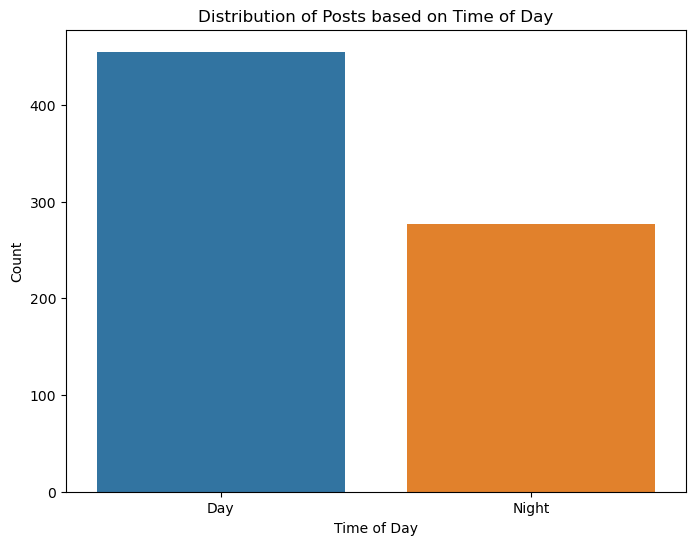

In [34]:
#Visualisation of different data aspects and model performance
#Time_of_Day Histogram - Distribution of user posts based on time of day
plt.figure(figsize=(8,6))
time_of_day_decoded=['Day','Night'] #Day is at 0th index and Night is at index 1
sns.countplot(data=df,x='Time_of_Day')
plt.title('Distribution of Posts based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')

#tick the locations [0,1] on x - axis and assign labels accordingly
plt.xticks([0,1], time_of_day_decoded)
plt.show()

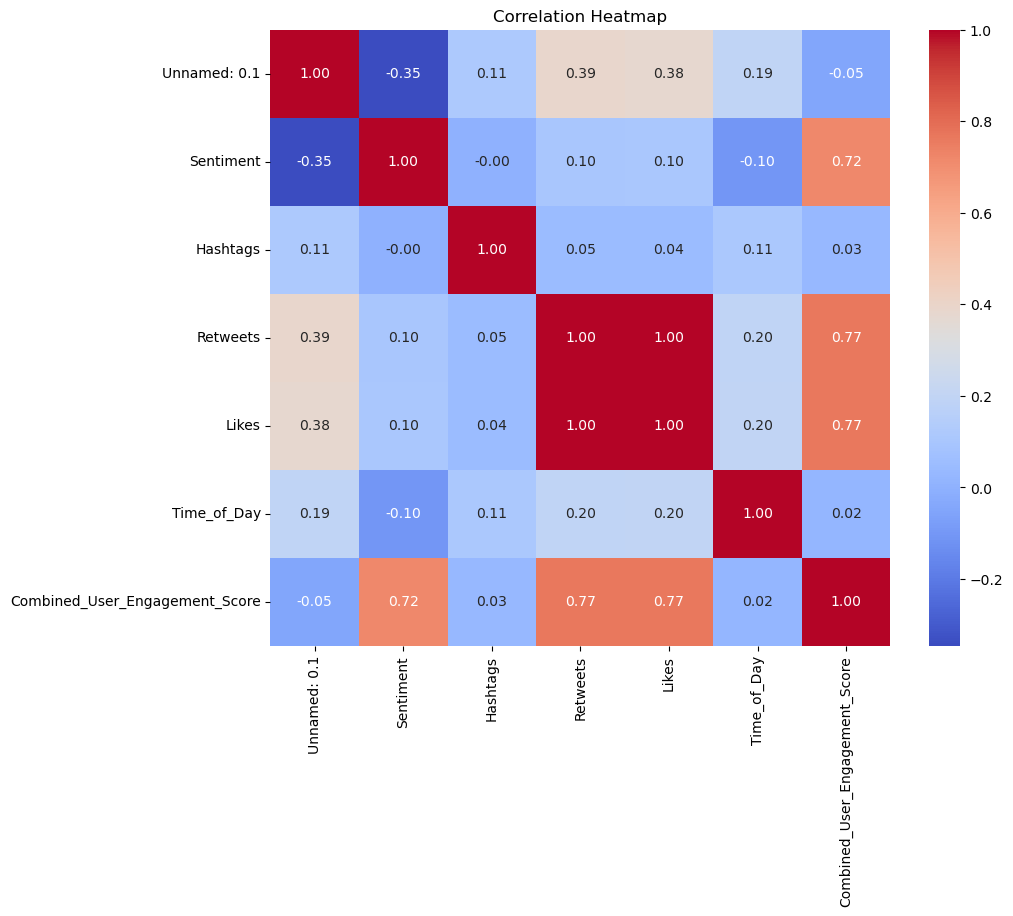

In [36]:
#Correlation Heatmap - Visualisation of correlation between different features of the dataset
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

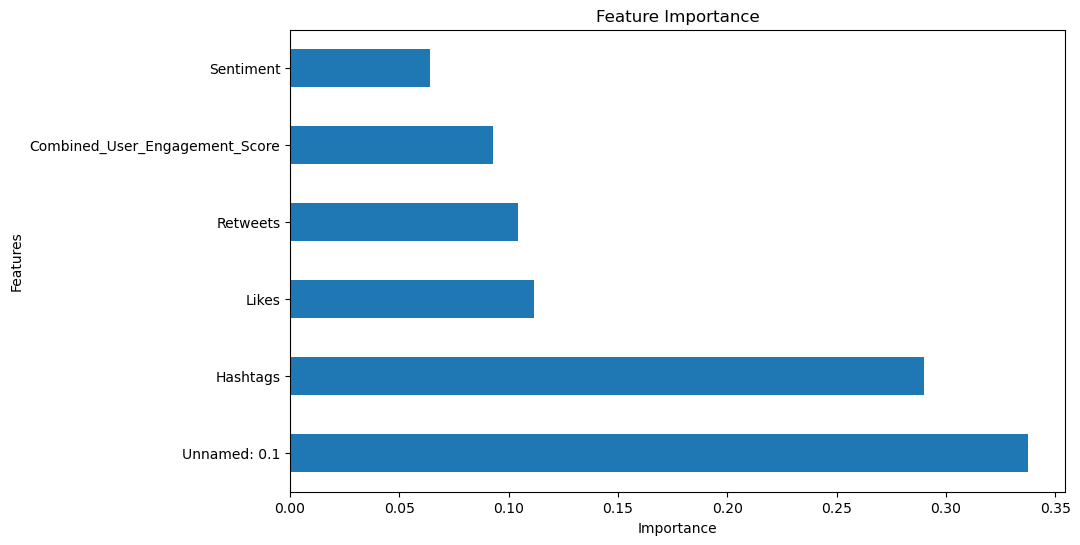

In [41]:
#Feature Importance Plot - Visualising importance of various features in RandomForestClassifier Model
plt.figure(figsize=(10,6))
feat_importances=panda.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [15]:
#Test the model
y_prediction= model.predict(X_test)
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        86
           1       0.69      0.56      0.62        61

    accuracy                           0.71       147
   macro avg       0.71      0.69      0.69       147
weighted avg       0.71      0.71      0.71       147



In [30]:
#Hashtags with maximum user engagement
max_engagement_hashtag = df.groupby('Hashtags')['Combined_User_Engagement_Score'].mean().idxmax()
print("Top Hashtag pair for Maximum User Engagement: ", lab_enc.inverse_transform([max_engagement_hashtag])[0])
print('\n')
top_hashtags=df.groupby('Hashtags')['Combined_User_Engagement_Score'].mean()
top_hashtags=top_hashtags[top_hashtags>0.8].nlargest(10)
decoded_hashtags=lab_enc.inverse_transform(top_hashtags.index)
print("Other Hashtags which can maximise user engagement : ")
for hashtag in decoded_hashtags[1:]:
    print(hashtag)

Top Hashtag pair for Maximum User Engagement:   #Elation #RareBookDiscovery              


Other Hashtags which can maximise user engagement : 
 #Anticipation #AdventureAwaits           
 #Motivation #FitnessGoals                 
 #Wonder #StargazingAdventure            
 #HeartwarmingMoments #SeniorFamily 
 #QuietMoments #BookishEscape 


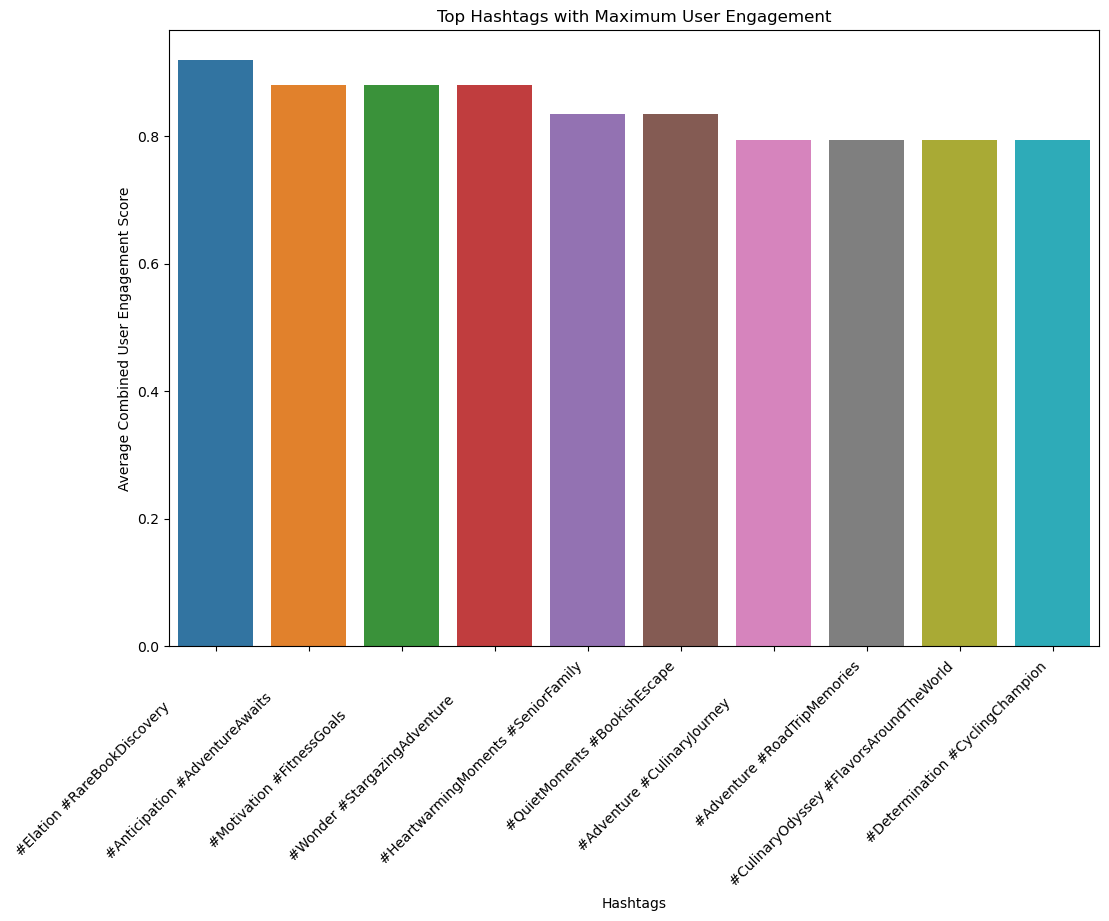

In [18]:
#Graph showing hashtags with maximum user engagement
plt.figure(figsize=(12,8))
max_engagement_hashtags=df.groupby('Hashtags')['Combined_User_Engagement_Score'].mean().nlargest(10)

decoded_hash=lab_enc.inverse_transform(max_engagement_hashtags.index)

sns.barplot(x=decoded_hash, y=max_engagement_hashtags.values)
plt.title('Top Hashtags with Maximum User Engagement')
plt.xlabel('Hashtags')
plt.ylabel('Average Combined User Engagement Score')
plt.xticks(rotation=45, ha='right')
plt.show()